In [36]:
# import libraries
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
from wordcloud import WordCloud
import matplotlib.pyplot as plt

###  Q.1: Show column names and have a look at their info.

In [65]:
df=pd.read_csv("Instagram_data.csv",encoding='latin-1')
df.head(3)

,Impressions,From Home,From Hashtags,From Explore,From Other,Saves,Comments,Shares,Likes,Profile Visits,Follows,Caption,Hashtags
0,3920,2586,1028,619,56,98,9,5,162,35,2,Here are some of the most important data visua...,#finance #money #business #investing #investme...
1,5394,2727,1838,1174,78,194,7,14,224,48,10,Here are some of the best data science project...,#healthcare #health #covid #data #datascience ...
2,4021,2085,1188,0,533,41,11,1,131,62,12,Learn how to train a machine learning model an...,#data #datascience #dataanalysis #dataanalytic...


In [38]:
df.columns

Index(['Impressions', 'From Home', 'From Hashtags', 'From Explore',
       'From Other', 'Saves', 'Comments', 'Shares', 'Likes', 'Profile Visits',
       'Follows', 'Caption', 'Hashtags'],
      dtype='object')

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119 entries, 0 to 118
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Impressions     119 non-null    int64 
 1   From Home       119 non-null    int64 
 2   From Hashtags   119 non-null    int64 
 3   From Explore    119 non-null    int64 
 4   From Other      119 non-null    int64 
 5   Saves           119 non-null    int64 
 6   Comments        119 non-null    int64 
 7   Shares          119 non-null    int64 
 8   Likes           119 non-null    int64 
 9   Profile Visits  119 non-null    int64 
 10  Follows         119 non-null    int64 
 11  Caption         119 non-null    object
 12  Hashtags        119 non-null    object
dtypes: int64(11), object(2)
memory usage: 12.2+ KB


### Q.2: Show the descriptive statistics of the data.

In [40]:
df.describe()

,Impressions,From Home,From Hashtags,From Explore,From Other,Saves,Comments,Shares,Likes,Profile Visits,Follows
count,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000
mean,5703.991597,2475.789916,1887.512605,1078.100840,171.092437,153.310924,6.663866,9.361345,173.781513,50.621849,20.756303
std,4843.780105,1489.386348,1884.361443,2613.026132,289.431031,156.317731,3.544576,10.089205,82.378947,87.088402,40.921580
min,1941.000000,1133.000000,116.000000,0.000000,9.000000,22.000000,0.000000,0.000000,72.000000,4.000000,0.000000
25%,3467.000000,1945.000000,726.000000,157.500000,38.000000,65.000000,4.000000,3.000000,121.500000,15.000000,4.000000
50%,4289.000000,2207.000000,1278.000000,326.000000,74.000000,109.000000,6.000000,6.000000,151.000000,23.000000,8.000000
75%,6138.000000,2602.500000,2363.500000,689.500000,196.000000,169.000000,8.000000,13.500000,204.000000,42.000000,18.000000
max,36919.000000,13473.000000,11817.000000,17414.000000,2547.000000,1095.000000,19.000000,75.000000,549.000000,611.000000,260.000000


###  Q.3: Check if your data contains any missing values

In [41]:
df.isnull().sum()

Impressions       0
From Home         0
From Hashtags     0
From Explore      0
From Other        0
Saves             0
Comments          0
Shares            0
Likes             0
Profile Visits    0
Follows           0
Caption           0
Hashtags          0
dtype: int64

### Q.4: When you start exploring your data, always start by exploring the main feature of your data. For example, as we are working on a dataset based on Instagram Reach, we should start by exploring the feature that contains data about reach. In our data, the Impressions column contains the data about the reach of an Instagram post. So let’s have a look at the distribution of the Impressions:

Descriptive Statistics:
Mean: 5703.991596638655
Median: 4289.0
Standard Deviation: 4843.780104765143
Minimum: 1941
Maximum: 36919


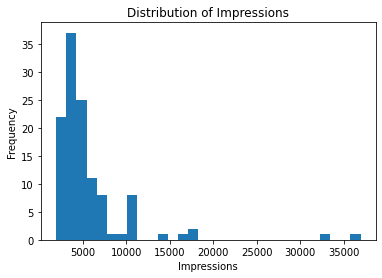

In [42]:
# Extract the Impressions column
impressions = df['Impressions']

# Calculate descriptive statistics for the Impression column
mean = impressions.mean()
median = impressions.median()
std = impressions.std()
min_value = impressions.min()
max_value = impressions.max()

# Print the descriptive statistics
print("Descriptive Statistics:")
print("Mean:", mean)
print("Median:", median)
print("Standard Deviation:", std)
print("Minimum:", min_value)
print("Maximum:", max_value)

# Visualize the distribution with a histogram
plt.hist(impressions, bins=30)
plt.xlabel('Impressions')
plt.ylabel('Frequency')
plt.title('Distribution of Impressions')
plt.show()

###  Q.5: Have a look at the number of impressions on each post over time as shown below

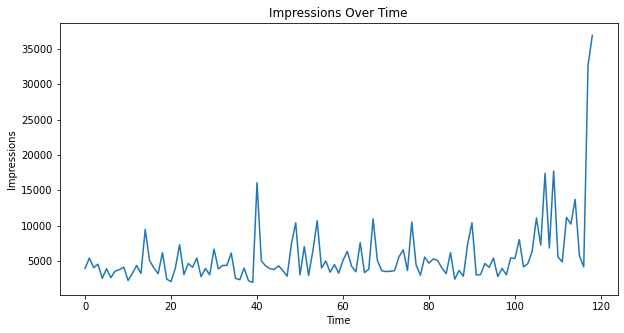

In [43]:
# Assign a sequential index as a proxy for time
df['Time'] = range(len(df))

# Visualize the data using a line plot or scatter plot
plt.figure(figsize=(10, 5))
plt.plot(df['Time'], df['Impressions'])
plt.xlabel('Time')
plt.ylabel('Impressions')
plt.title('Impressions Over Time')
plt.show()

### Q.6: Have a look at all the metrics like Likes, Saves, and Follows from each post over time as shown below

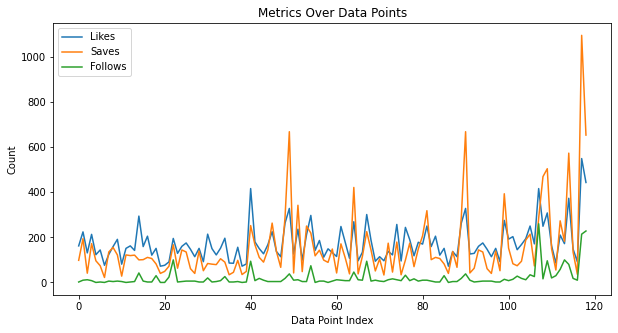

In [44]:
# Assign a sequential index as a proxy for time
df['Time'] = range(len(df))

# Visualize the data using multiple line plots
plt.figure(figsize=(10, 5))
plt.plot(df['Time'], df['Likes'], label='Likes')
plt.plot(df['Time'], df['Saves'], label='Saves')
plt.plot(df['Time'], df['Follows'], label='Follows')
plt.xlabel('Data Point Index')
plt.ylabel('Count')
plt.title('Metrics Over Data Points')
plt.legend()
plt.show()

### Q.7: Have a look at the distribution of reach from different sources as shown below

In [55]:
# Calculate the reach from different sources
reach_from_home = df["From Home"].sum()
reach_from_hashtags = df["From Hashtags"].sum()
reach_from_explore = df["From Explore"].sum()
reach_from_other = df["From Other"].sum()

# Display the reach from different sources
print("Reach from Home:", reach_from_home)
print("Reach from Hashtags:", reach_from_hashtags)
print("Reach from Explore:", reach_from_explore)
print("Reach from Other:", reach_from_other)

Reach from Home: 294619
Reach from Hashtags: 224614
Reach from Explore: 128294
Reach from Other: 20360


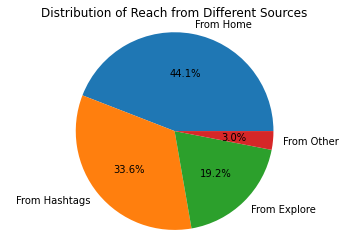

In [56]:
# Data
reach = [294619, 224614, 128294, 20360]  # Replace with the actual values from the dataset
labels = ['From Home', 'From Hashtags', 'From Explore', 'From Other']

# Plotting the pie chart
plt.pie(reach, labels=labels, autopct='%1.1f%%')
plt.title('Distribution of Reach from Different Sources')
plt.axis('equal')  # Equal aspect ratio ensures that the pie is drawn as a circle

# Displaying the chart
plt.show()

### Q.8: Have a look at the distribution of engagement sources as shown below

In [57]:
df.columns

Index(['Impressions', 'From Home', 'From Hashtags', 'From Explore',
       'From Other', 'Saves', 'Comments', 'Shares', 'Likes', 'Profile Visits',
       'Follows', 'Caption', 'Hashtags', 'Time'],
      dtype='object')

In [58]:
# Calculate the reach from different sources
reach_from_home = df["Likes"].sum()
reach_from_hashtags = df["Saves"].sum()
reach_from_explore = df["Shares"].sum()
reach_from_other = df["Comments"].sum()

# Display the reach from different sources
print("Reach from Likes:", reach_from_home)
print("Reach from Saves:", reach_from_hashtags)
print("Reach from Explore:", reach_from_explore)
print("Reach from Comments:", reach_from_other)

Reach from Likes: 20680
Reach from Saves: 18244
Reach from Explore: 1114
Reach from Comments: 793


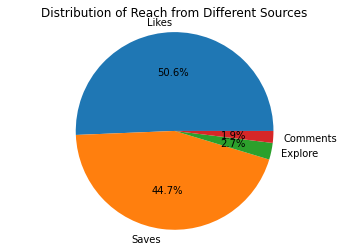

In [59]:
reach = [20680, 18244, 1114, 793]  # Replace with the actual values from the dataset
labels = ['Likes', 'Saves', 'Explore', 'Comments']

# Plotting the pie chart
plt.pie(reach, labels=labels, autopct='%1.1f%%')
plt.title('Distribution of Reach from Different Sources')
plt.axis('equal')  # Equal aspect ratio ensures that the pie is drawn as a circle

# Displaying the chart
plt.show()

### Q.9: Have a look at the relationship between the number of profile visits and follows as shown below

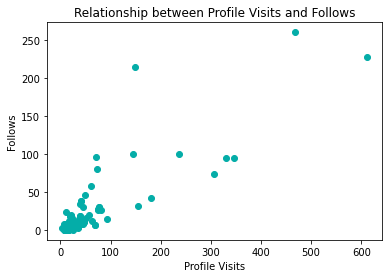

In [60]:
# Extract the required columns
profile_visits = df["Profile Visits"]
follows = df["Follows"]

# Create a scatter plot
plt.scatter(profile_visits, follows,color='#04ADA8')
plt.xlabel("Profile Visits")
plt.ylabel("Follows")
plt.title("Relationship between Profile Visits and Follows")

# Display the plot
plt.show()

###  Q.10: Have a look at the type of hashtags used in the posts using a wordcloud as shown below

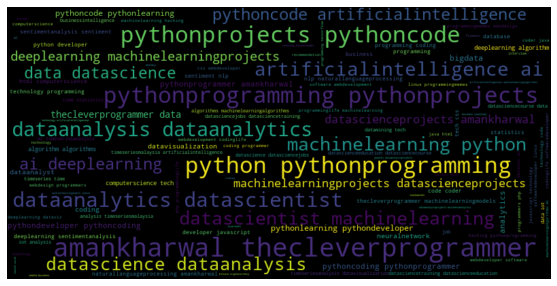

In [67]:
# Extract the hashtags
hashtags = df["Hashtags"].str.cat(sep=' ')

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='black').generate(hashtags)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### Q.11: Have a look at the correlation between all the features as shown below

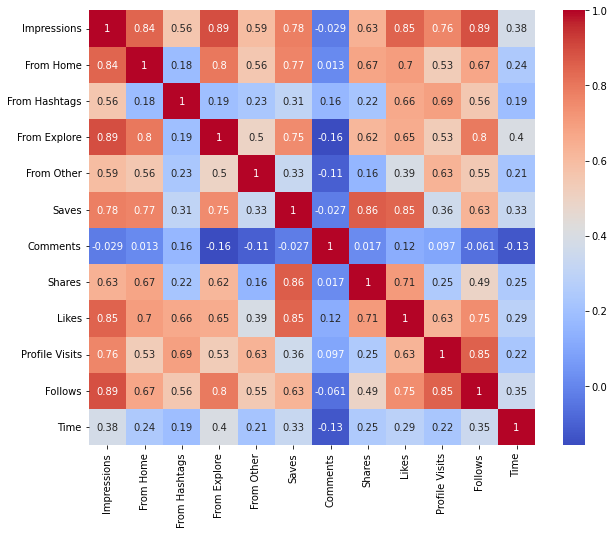

In [62]:
import seaborn as sns
# Select only numeric columns for correlation analysis
numeric_columns = df.select_dtypes(include=[float, int])

# Calculate the correlation matrix
correlation_matrix = numeric_columns.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")

# Display the plot
plt.show()

### Q.12: Havea look at the distribution of hashtags to see which hashtag is used the most in all the posts as shown below

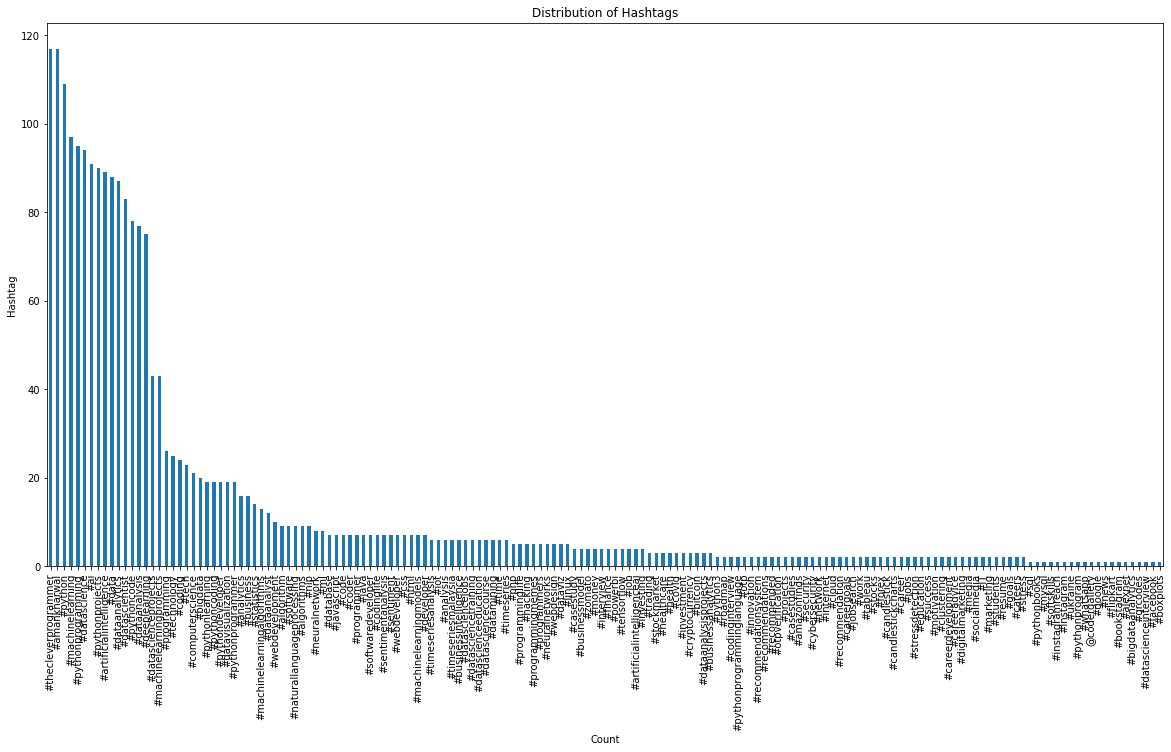

In [63]:
# Extract the hashtags
hashtags = df["Hashtags"].str.split()

# Flatten the list of hashtags
all_hashtags = [tag for sublist in hashtags for tag in sublist]

# Count the occurrences of each hashtag
hashtag_counts = pd.Series(all_hashtags).value_counts()

# Plot the distribution of hashtags
plt.figure(figsize=(20, 10))
hashtag_counts.plot(kind="bar")
plt.xlabel("Count")
plt.ylabel("Hashtag")
plt.title("Distribution of Hashtags")
plt.show()

### Q.13: Have a look at the distribution of likes and impressions received from the presence of each hashtag on the post as shown below

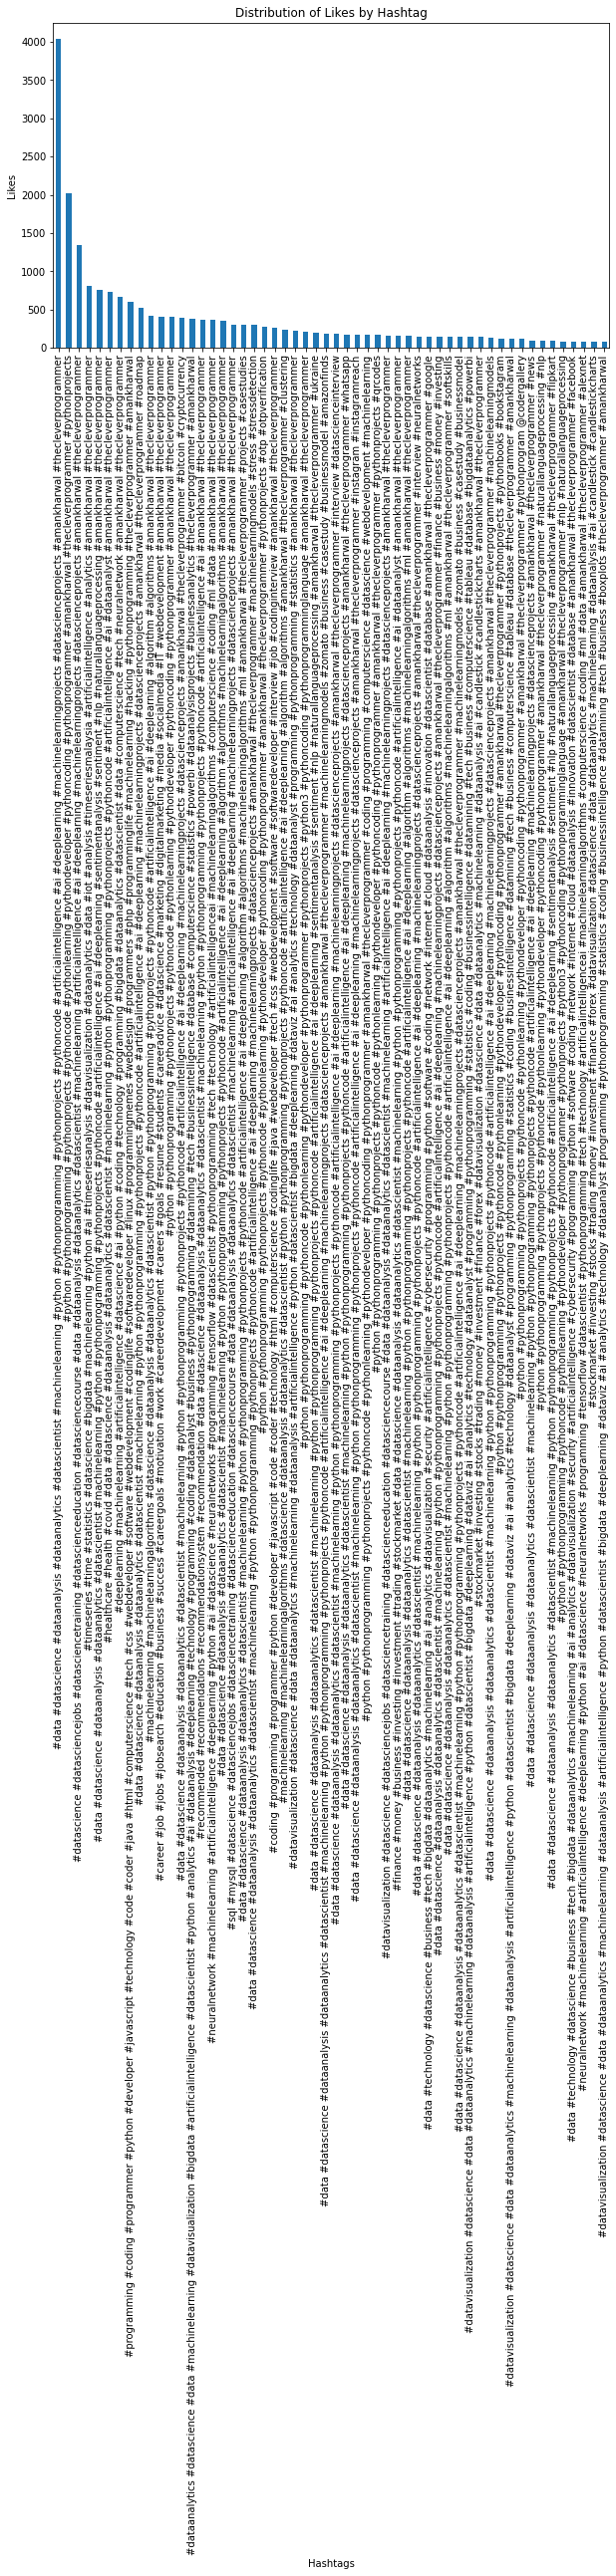

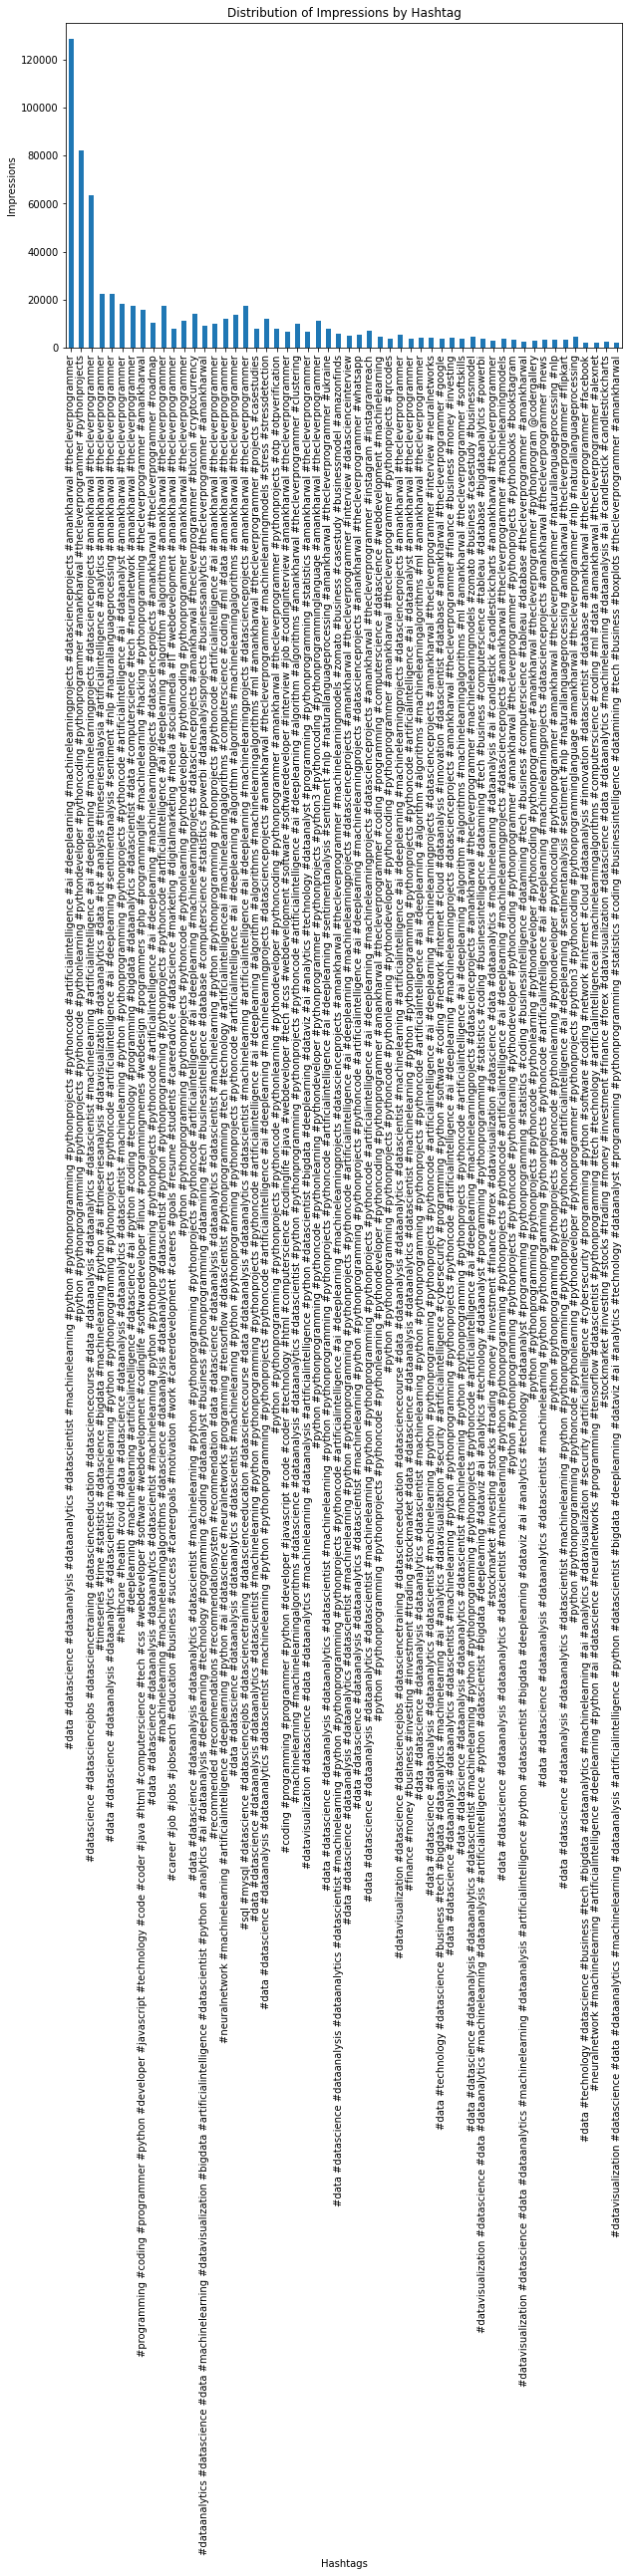

In [64]:
# Group the data by hashtags and calculate the sum of likes and impressions
hashtags_grouped = df.groupby("Hashtags").agg({"Likes": "sum", "Impressions": "sum"})

# Sort the data by likes in descending order
hashtags_grouped = hashtags_grouped.sort_values("Likes", ascending=False)

# Plot the distribution of likes
plt.figure(figsize=(10, 6))
hashtags_grouped["Likes"].plot(kind="bar")
plt.xlabel("Hashtags")
plt.ylabel("Likes")
plt.title("Distribution of Likes by Hashtag")
plt.show()

# Plot the distribution of impressions
plt.figure(figsize=(10, 6))
hashtags_grouped["Impressions"].plot(kind="bar")
plt.xlabel("Hashtags")
plt.ylabel("Impressions")
plt.title("Distribution of Impressions by Hashtag")
plt.show()

## Summary
1. `Impressions:` Represents the number of impressions (views) of the Instagram posts.
2. `From Home:` Indicates the number of impressions that originated from the user's home feed.
3. `From Hashtags:` Represents the number of impressions that originated from hashtags.
4. `From Explore:` Indicates the number of impressions that originated from the Explore page.
5. `From Other:` Represents the number of impressions that originated from sources other than home, hashtags, or explore.
6. `Saves:` Represents the number of times the posts were saved by users.
7. `Comments:` Indicates the number of comments received on the posts.
8. `Shares:` Represents the number of times the posts were shared by users.
9. `Likes:` Indicates the number of likes received on the posts.
10. `Profile Visits:` Represents the number of visits to the user's profile.
11. `Follows:` Indicates the number of new followers gained from the posts.
12. `Caption:` Represents the caption or description of the Instagram posts.
13. `Hashtags:` Indicates the hashtags used in the Instagram posts.

`Word Cloud of Hashtags:` A word cloud was generated to analyze the types of hashtags used in the posts. This visualization provided an overview of the most commonly used hashtags, with the size of each word indicating its frequency of occurrence.

`Correlation between Features:` The correlation analysis examined the relationships between different features in the dataset. The correlation matrix and heatmap revealed the strength and direction of the correlations, helping to identify any significant associations between variables.

`Distribution of Hashtags:` The distribution of hashtags used in the posts was analyzed. By counting the occurrences of each hashtag and plotting a bar chart, the most frequently used hashtag was identified, giving insights into the popular trends in hashtag usage.

`Likes and Impressions by Hashtag:` The analysis focused on the distribution of likes and impressions received from each hashtag on the posts. By grouping the data by hashtags and calculating the sum of likes and impressions, bar charts were created to visualize the engagement and reach associated with different hashtags.